In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Попробуем обучить модель на пространстве, полученном при соединении двух датасетов.

In [3]:
df = pd.read_csv('data/train/train_prepared.csv', header = 0) # выгрузка фрейма из .csv

In [4]:
df.head() # посмотрим на полученную струтуру записей

,first_active_month,card_id,feature_1,feature_2,feature_3,target,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')","('purchase_amount', 'sum')","('month_lag', 'min')","('month_lag', 'mean')","('month_lag', 'median')","('month_lag', 'std')"
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.739395,2.258395,-0.638341,-0.698042,0.212139,260,-165.968739,-8,-3.911538,-4.0,2.397687
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,-0.742400,4.630299,-0.600018,-0.708590,0.384967,350,-210.006336,-12,-5.031429,-5.0,3.804934
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,-0.730138,-0.145847,-0.678311,-0.698868,0.087380,43,-29.167391,-13,-8.604651,-10.0,3.842987
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,-0.740897,1.445596,-0.642745,-0.707989,0.261624,77,-49.491364,-5,-2.831169,-4.0,1.802065
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.746156,7.193041,-0.366073,-0.689807,1.352094,133,-48.687656,-3,-1.285714,-1.0,1.026700


In [5]:
df.corr() # посмотрим корелляции между признаками и целевой функцией

,feature_1,feature_2,feature_3,target,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')","('purchase_amount', 'sum')","('month_lag', 'min')","('month_lag', 'mean')","('month_lag', 'median')","('month_lag', 'std')"
feature_1,1.000000,-0.130969,0.583092,-0.014251,0.029975,-0.000123,-0.000154,0.124743,-0.000188,0.016334,-0.000015,-0.100992,-0.092372,-0.081072,0.093733
feature_2,-0.130969,1.000000,0.060925,-0.006242,-0.017036,-0.002072,-0.002277,-0.073170,-0.002226,-0.001444,-0.002228,-0.087052,-0.082886,-0.072571,0.081388
feature_3,0.583092,0.060925,1.000000,-0.008125,-0.016297,0.001821,0.001860,-0.008107,0.001849,-0.019213,0.001853,-0.111970,-0.098449,-0.083790,0.101294
target,-0.014251,-0.006242,-0.008125,1.000000,0.005585,0.000101,0.000295,0.004974,0.000243,-0.011640,0.000154,0.001677,-0.004000,-0.004420,-0.005097
"('purchase_amount', 'min')",0.029975,-0.017036,-0.016297,0.005585,1.000000,-0.000486,-0.000142,0.522730,-0.000317,-0.084072,0.000071,0.025623,0.011080,0.008284,-0.012613
"('purchase_amount', 'max')",-0.000123,-0.002072,0.001821,0.000101,-0.000486,1.000000,0.996174,-0.001012,0.997718,0.000740,0.999975,0.001853,0.002380,0.002669,-0.001508
"('purchase_amount', 'mean')",-0.000154,-0.002277,0.001860,0.000295,-0.000142,0.996174,1.000000,-0.000474,0.999773,-0.001759,0.996139,0.002867,0.003320,0.003502,-0.002286
"('purchase_amount', 'median')",0.124743,-0.073170,-0.008107,0.004974,0.522730,-0.001012,-0.000474,1.000000,-0.000777,-0.109555,0.000260,-0.000491,-0.016500,-0.017472,0.017745
"('purchase_amount', 'std')",-0.000188,-0.002226,0.001849,0.000243,-0.000317,0.997718,0.999773,-0.000777,1.000000,-0.001393,0.997685,0.002685,0.003144,0.003342,-0.002160
"('purchase_amount', 'size')",0.016334,-0.001444,-0.019213,-0.011640,-0.084072,0.000740,-0.001759,-0.109555,-0.001393,1.000000,-0.004046,-0.324640,-0.257466,-0.224024,0.279678


# Модель со всеми факторами

In [6]:
# Переводим в векторное представление

In [5]:
X1 = np.array(df.iloc[:, 2:5 ])

In [6]:
X2 = np.array(df.iloc[:, 6: ])

In [7]:
X = np.column_stack((X1, X2))

In [8]:
X.shape

(201917, 14)

In [9]:
y = np.array(df.target)

In [ ]:
#Моделируем

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Assessing

In [15]:
cross_val_score(model, X, y, cv=10) # не очень

array([ 3.18532417e-04,  6.28762783e-04,  9.00118425e-04, -1.30112505e-01,
        8.03042915e-05,  9.40101614e-04,  8.87545138e-04, -1.33121291e-04,
        8.67859650e-04,  5.10684604e-04])

Какое СКО поскажет модель среднего (худшая)

In [17]:
import math

In [18]:
math.sqrt(mean_squared_error(y_test, [y.mean()] * 60576))

3.8014032060353706

In [19]:
r2_score(y_test, [y.mean()] * 60576)

-2.8357685356139584e-05

Оценка выбранной модели

In [20]:
r2_score(y_test, y_pred) # не описывает дисперсии остатков

0.0007810601890729796

In [21]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

3.799864476386892

In [23]:
model.coef_

array([-5.34498149e-02, -4.57353005e-02,  1.21874896e-02,  1.41264393e-01,
        4.70087767e-05,  7.58001243e-04,  1.51609733e-02, -2.39771575e-04,
       -5.02904451e-04, -4.08671434e-05, -8.12606360e-03, -6.04050387e-02,
        1.71043407e-02, -8.50437658e-02])

In [24]:
model.intercept_

-0.03377086892528208

Посмотрим остатки

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

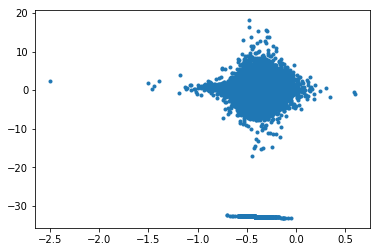

In [140]:
plt.plot(y_pred, y_test - y_pred, '.')

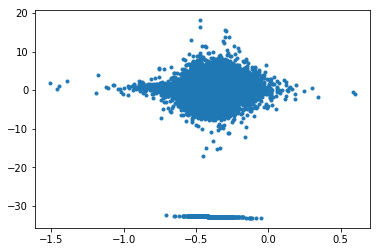

In [141]:
# 60576 dots
plt.plot(y_pred[10000:], (y_test - y_pred)[10000:], '.')

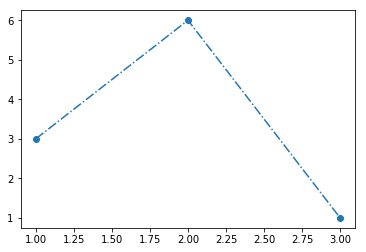

In [69]:
plt.plot([1, 2, 3], [3, 6, 1], '-.', marker='o')

Дисперсии остатков не однородны. Также видна область выбросов в районе -30.

# Инжинириг признаков

Добавим квадраты факторов, т.к. они могут лучше описывать целевую функцию

In [23]:
df_features = df.loc[:, "('purchase_amount', 'min')": ]

In [24]:
df_features.shape

(201917, 11)

In [25]:
df_features.head(1)

,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')","('purchase_amount', 'sum')","('month_lag', 'min')","('month_lag', 'mean')","('month_lag', 'median')","('month_lag', 'std')"
0,-0.739395,2.258395,-0.638341,-0.698042,0.212139,260,-165.968739,-8,-3.911538,-4.0,2.397687


In [26]:
features = list(df_features.columns)
features

["('purchase_amount', 'min')",
 "('purchase_amount', 'max')",
 "('purchase_amount', 'mean')",
 "('purchase_amount', 'median')",
 "('purchase_amount', 'std')",
 "('purchase_amount', 'size')",
 "('purchase_amount', 'sum')",
 "('month_lag', 'min')",
 "('month_lag', 'mean')",
 "('month_lag', 'median')",
 "('month_lag', 'std')"]

In [27]:
for idx, feature in enumerate(features): #квадраты
    col_name = feature + '_square'
    df[col_name] = df_features[feature].apply(lambda x: x ** 2)

In [28]:
df.shape

(201917, 28)

In [29]:
df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')",...,"('purchase_amount', 'max')_square","('purchase_amount', 'mean')_square","('purchase_amount', 'median')_square","('purchase_amount', 'std')_square","('purchase_amount', 'size')_square","('purchase_amount', 'sum')_square","('month_lag', 'min')_square","('month_lag', 'mean')_square","('month_lag', 'median')_square","('month_lag', 'std')_square"
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.739395,2.258395,-0.638341,-0.698042,...,5.100346,0.407480,0.487262,0.045003,67600,27545.622465,64,15.300133,16.0,5.748901
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,-0.742400,4.630299,-0.600018,-0.708590,...,21.439673,0.360022,0.502100,0.148200,122500,44102.661299,144,25.315273,25.0,14.477519
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,-0.730138,-0.145847,-0.678311,-0.698868,...,0.021271,0.460106,0.488417,0.007635,1849,850.736703,169,74.040022,100.0,14.768549
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,-0.740897,1.445596,-0.642745,-0.707989,...,2.089746,0.413121,0.501249,0.068447,5929,2449.395145,25,8.015517,16.0,3.247437
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.746156,7.193041,-0.366073,-0.689807,...,51.739838,0.134009,0.475834,1.828160,17689,2370.487878,9,1.653061,1.0,1.054113


In [178]:
df.corr()

,feature_1,feature_2,feature_3,target,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')",...,"('purchase_amount', 'max')_square","('purchase_amount', 'mean')_square","('purchase_amount', 'median')_square","('purchase_amount', 'std')_square","('purchase_amount', 'size')_square","('purchase_amount', 'sum')_square","('month_lag', 'min')_square","('month_lag', 'mean')_square","('month_lag', 'median')_square","('month_lag', 'std')_square"
feature_1,1.000000,-0.130969,0.583092,-0.014251,0.029975,-0.000123,-0.000154,0.124743,-0.000188,0.016334,...,-0.000194,-0.000197,0.003446,-0.000197,0.018997,-0.000193,0.105654,0.090220,0.076657,0.093791
feature_2,-0.130969,1.000000,0.060925,-0.006242,-0.017036,-0.002072,-0.002277,-0.073170,-0.002226,-0.001444,...,-0.002206,-0.002208,-0.004344,-0.002208,0.004241,-0.002206,0.089587,0.083428,0.074306,0.082311
feature_3,0.583092,0.060925,1.000000,-0.008125,-0.016297,0.001821,0.001860,-0.008107,0.001849,-0.019213,...,0.001948,0.001949,0.006774,0.001949,-0.013529,0.001948,0.116870,0.096460,0.081421,0.102789
target,-0.014251,-0.006242,-0.008125,1.000000,0.005585,0.000101,0.000295,0.004974,0.000243,-0.011640,...,0.000269,0.000270,-0.000425,0.000270,-0.001521,0.000269,0.009330,0.012207,0.010362,0.004321
"('purchase_amount', 'min')",0.029975,-0.017036,-0.016297,0.005585,1.000000,-0.000486,-0.000142,0.522730,-0.000317,-0.084072,...,-0.000302,-0.000300,0.680700,-0.000300,-0.036936,-0.000302,-0.024886,-0.006803,-0.003115,-0.010072
"('purchase_amount', 'max')",-0.000123,-0.002072,0.001821,0.000101,-0.000486,1.000000,0.996174,-0.001012,0.997718,0.000740,...,0.994776,0.994627,0.000051,0.994645,0.001153,0.994776,-0.001475,-0.001291,-0.001160,-0.001418
"('purchase_amount', 'mean')",-0.000154,-0.002277,0.001860,0.000295,-0.000142,0.996174,1.000000,-0.000474,0.999773,-0.001759,...,0.999592,0.999571,0.000208,0.999575,-0.000679,0.999592,-0.002502,-0.002206,-0.001900,-0.002118
"('purchase_amount', 'median')",0.124743,-0.073170,-0.008107,0.004974,0.522730,-0.001012,-0.000474,1.000000,-0.000777,-0.109555,...,-0.000795,-0.000792,0.605854,-0.000792,-0.049444,-0.000795,-0.000790,0.016077,0.018590,0.018477
"('purchase_amount', 'std')",-0.000188,-0.002226,0.001849,0.000243,-0.000317,0.997718,0.999773,-0.000777,1.000000,-0.001393,...,0.999060,0.999008,0.000061,0.999016,-0.000455,0.999060,-0.002319,-0.002025,-0.001747,-0.002006
"('purchase_amount', 'size')",0.016334,-0.001444,-0.019213,-0.011640,-0.084072,0.000740,-0.001759,-0.109555,-0.001393,1.000000,...,-0.001625,-0.001646,-0.002069,-0.001645,0.830201,-0.001624,0.325593,0.214322,0.158917,0.255652


Корелляции с ЦФ опять, увы, низкие.

# Выбросы в целевой функции

Попробуем разделить тренировочную выборку по целевой функции. 

In [216]:
df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')",...,"('purchase_amount', 'max')_square","('purchase_amount', 'mean')_square","('purchase_amount', 'median')_square","('purchase_amount', 'std')_square","('purchase_amount', 'size')_square","('purchase_amount', 'sum')_square","('month_lag', 'min')_square","('month_lag', 'mean')_square","('month_lag', 'median')_square","('month_lag', 'std')_square"
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.739395,2.258395,-0.638341,-0.698042,...,5.100346,0.407480,0.487262,0.045003,67600,27545.622465,64,15.300133,16.0,5.748901
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,-0.742400,4.630299,-0.600018,-0.708590,...,21.439673,0.360022,0.502100,0.148200,122500,44102.661299,144,25.315273,25.0,14.477519
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,-0.730138,-0.145847,-0.678311,-0.698868,...,0.021271,0.460106,0.488417,0.007635,1849,850.736703,169,74.040022,100.0,14.768549
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,-0.740897,1.445596,-0.642745,-0.707989,...,2.089746,0.413121,0.501249,0.068447,5929,2449.395145,25,8.015517,16.0,3.247437
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.746156,7.193041,-0.366073,-0.689807,...,51.739838,0.134009,0.475834,1.828160,17689,2370.487878,9,1.653061,1.0,1.054113


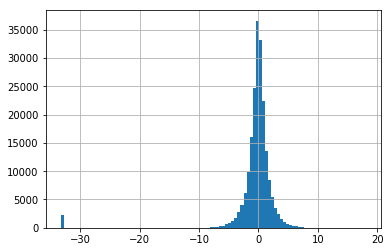

In [219]:
df.target.hist(bins = 100)

Часть имеет нормальное распределние, а часть же выделяется, похоже на выброс.

In [30]:
df_no_outliers = df[df.target > -30]

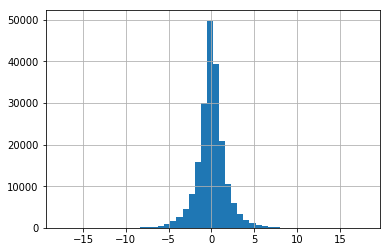

In [29]:
df_no_outliers.target.hist(bins = 50)

Теперь видимо просто нормальное распределение

In [30]:
df.shape

(201917, 17)

In [31]:
df_no_outliers.shape

(199710, 28)

In [32]:
df_outliers = df[df.target < -30]

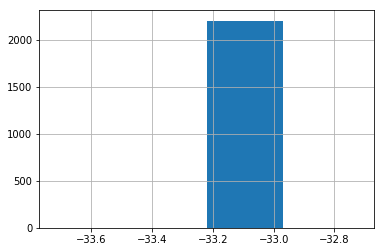

In [33]:
df_outliers.target.hist(bins = 4) # непонятная группа

Видим равномерное распределение

In [32]:
X1_norm = np.array(df_no_outliers.iloc[:, 2:5 ])
X2_norm = np.array(df_no_outliers.iloc[:, 6: ])
X_norm = np.column_stack((X1_norm, X2_norm))
y_norm = np.array(df_no_outliers.target)

In [33]:
X_norm.shape

(199710, 25)

In [34]:
y_norm.shape

(199710,)

In [35]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=123)

In [36]:
model2 = LinearRegression()
model2.fit(X_train_norm, y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_norm_pred = model2.predict(X_test_norm)

Оценим модель

In [38]:
r2_score(y_test_norm, y_norm_pred) # уравнение снова низкого качества

0.007902559767020145

In [39]:
math.sqrt(mean_squared_error(y_test_norm, y_norm_pred)) #однако, СКО на этой части выборки лучшее

1.698984721062416

Посмотрим остатки

In [41]:
import matplotlib.pyplot as plt

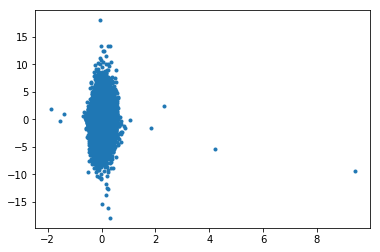

In [42]:
plt.plot(y_norm_pred, (y_test_norm - y_norm_pred), '.')

Таким образом, планируем рассматривать отдельно две части целевой функцию (нормальную и равномерную). Однако, т.к. в тестовых данных нет ЦФ, возможно, придется построить классификатор (по всем прочим факторам). А далее действовать как в последнем случае.

Также генерировать новые признаки из дополнительных данных по магазинам и отобрать лучшие.

# Тестовая выборка

In [43]:
df_t = pd.read_csv('data/test/test_prepared.csv', header = 0) # выгрузка фрейма из .csv

In [44]:
df_t.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')","('purchase_amount', 'sum')","('month_lag', 'min')","('month_lag', 'mean')","('month_lag', 'median')","('month_lag', 'std')"
0,2017-04,C_ID_0ab67a22ab,3,3,1,-0.722114,-0.383266,-0.592385,-0.671775,0.182843,3.0,-1.777156,2.0,2.000000,2.0,0.000000
1,2017-01,C_ID_130fd0cbdd,2,3,0,-0.740897,-0.506484,-0.660522,-0.656749,0.071147,9.0,-5.944698,1.0,1.444444,1.0,0.527046
2,2017-08,C_ID_b709037bc5,5,1,1,-0.724368,0.904506,0.090069,0.090069,1.151788,2.0,0.180138,1.0,1.000000,1.0,0.000000
3,2017-12,C_ID_d27d835a9f,2,1,0,-0.671775,-0.447880,-0.574367,-0.581391,0.073166,10.0,-5.743674,1.0,1.300000,1.0,0.483046
4,2015-12,C_ID_2b5e3df5c2,5,1,1,-0.704082,14.279604,2.010833,-0.654495,6.028671,6.0,12.064997,1.0,1.166667,1.0,0.408248


In [48]:
df_t.describe()

,feature_1,feature_2,feature_3,"('purchase_amount', 'min')","('purchase_amount', 'max')","('purchase_amount', 'mean')","('purchase_amount', 'median')","('purchase_amount', 'std')","('purchase_amount', 'size')","('purchase_amount', 'sum')","('month_lag', 'min')","('month_lag', 'mean')","('month_lag', 'median')","('month_lag', 'std')"
count,123623.00000,123623.000000,123623.000000,110015.000000,110015.000000,110015.000000,110015.000000,93792.000000,110015.000000,110015.000000,110015.000000,110015.000000,110015.000000,93792.000000
mean,3.10926,1.741796,0.564377,-0.656742,-0.122972,-0.519548,-0.577451,0.232904,6.756770,-3.709330,1.159842,1.477492,1.466109,0.395955
std,1.18911,0.749195,0.495840,0.912294,1.760149,0.972459,0.946249,0.577530,6.650219,4.503888,0.366461,0.331071,0.468240,0.228542
min,1.00000,1.000000,0.000000,-0.746893,-0.746893,-0.746893,-0.746893,0.000000,1.000000,-60.780407,1.000000,1.000000,1.000000,0.000000
25%,2.00000,1.000000,0.000000,-0.735638,-0.647883,-0.692812,-0.707163,0.039269,2.000000,-5.210135,1.000000,1.230769,1.000000,0.333333
50%,3.00000,2.000000,1.000000,-0.723617,-0.511593,-0.641372,-0.671790,0.089373,5.000000,-2.667732,1.000000,1.500000,1.500000,0.500000
75%,4.00000,2.000000,1.000000,-0.691610,-0.175930,-0.529450,-0.596793,0.215167,9.000000,-1.206599,1.000000,1.714286,2.000000,0.534522
max,5.00000,3.000000,1.000000,263.157498,263.157498,263.157498,263.157498,35.734115,104.000000,263.157498,2.000000,2.000000,2.000000,0.707107


In [ ]:
df_t = df_t[df_t.]

In [45]:
X1_norm_t = np.array(df_t.iloc[:, 2:5 ])
X2_norm_t = np.array(df_t.iloc[:, 6: ])
X_norm_t = np.column_stack((X1_norm_t, X2_norm_t))

In [47]:
submission = model2.predict(X_norm_t)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').